In [1]:
import pandas as pd
pd.set_option('display.max_columns', 999)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.encoding import OneHotEncoder
# from feature_engine.encoding import OrdinalEncoder
from feature_engine.imputation import CategoricalImputer

from sklearn_pandas import DataFrameMapper
# https://github.com/scikit-learn-contrib/sklearn-pandas

from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer, SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, confusion_matrix, classification_report, recall_score, f1_score, precision_score, plot_roc_curve, RocCurveDisplay, auc, roc_auc_score, accuracy_score
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

from IPython.display import HTML

import helpers as hp


In [2]:
df = pd.read_csv('income-db.csv')#.drop(columns = ['educational-num'])
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


* `age`: Edad del individuo.
* `workclass`: Naturaleza de la organización que emplea al individuo.
* `education`: Nivel educacional del individuo:
    | Variable          | Explicación                       |
    | ----------------- | ------------------                |
    | __Bachelors__     | (Licenciado)                      |
    | __Some-college__  | (Superior incompleta)             |
    | __11th__          | (3ro medio)                       |
    | __HS-grad__       | (Secundaria completa)             |
    | __Prof-school__   | (Escuela profesional)             |
    | __ssoc-acdm__     | (Técnico superior administrativo) |
    | __Assoc-voc__     | (Técnico superior vocacional)     |
    | __9th__           | (1ro medio)                       |
    | __7th-8th__       | (7mo-8vo)                         |
    | __12th__          | (4to medio)                       |
    | __Masters__       | (Maestría de postgrado)           |
    | __1st-4th__       | (1ro-4to básico)                  |
    | __10th__          | (2do medio)                       |
    | __Doctorate__     | (Doctorado)                       |
    | __5th-6th__       | (5to-6to)                         |
    | __Preschool__     | (Preescolar).                     |
     
    <br>  
    
* `capital-gains`: Ingresos generados por inversiones fuera del trabajo asalariado
* `capital-losses`: Pérdidas generadas por inversiones fuera del trabajo asalariado.
* `fnlwgt`: Ponderador muestral.
* `marital-status`: Estado civil del individuo: 
    | Variable                  | Explicación                   |
    | ---------------------     | ------------------            |
    | __Married-civ-spouse__    | (Casado/a régimen civil)      |
    | __Divorced__              | (Divorciado/a),               |
    | __Never-married__         | (Soltero/a)                   |
    | __Separated__             | (Separado/a),                 |
    | __Widowed__               | (Viudo/a)                     |
    | __Married-spouse-absent__ | (Casado con esposo/a ausente) |
    | __Married-AF-spouse__     | (Casado/a régimen castrense). |  
 
    <br>  
    
* `occupation`: Ocupación del individuo: 

    | Variable              | Explicación                           |
    | --------------------- | ------------------                    |
    | __Tech-support__      | (Soporte técnico),                    |
    | __Craft-repair__      | (Reparaciones),                       |
    | __Other-service__     | (Otros servicios),                    |
    | __Sales__             | (Ventas)                              |
    | __Exec-managerial__   | (Ejecutivo administrativos),          |
    | __Prof-specialty__    | (Profesores)                          |
    | __Handlers-cleaners__ | (Aseo y ornato)                       |
    | __Machine-op-inspct__ | (Inspectores de maquinarias)          |
    | __Adm-clerical__      | (Administrativos servicio al cliente) |
    | __Farming-fishing__   | (Pesca-ganadería),                    |
    | __Transport-moving__  | (Transporte)                          |
    | __Priv-house-serv__   | (Asesor del hogar)                    |
    | __Protective-serv__   | (servicios de seguridad)              |
    | __Armed-Forces__      | (Fuerzas armadas).                    |
 
    <br>  
    
* `relationship`: Relación respecto a su familia 

    | Variable              | Explicación                   |
    | --------------------- | ------------------            |
    | __Wife__              | (Esposa)                      |
    | __Own-child__         | (hijo único)                  |
    | __Husband__           | (Esposo)                      |
    | __Not-in-family__     | (No pertenece a la familia)   |
    | __Other-relative__    | (Familiar de otro tipo)       |
    | __Unmarried__         | (Soltero).                    |
     
    <br>  
    
* `race`: Raza del encuestado 
    | Variable                  | Explicación                               |
    | ---------------------     | ------------------                        |
    | __White__                 | (Blanco caucásico)                        |
    | __Asian-Pac-Islander__    | (Isleño del Asia Pacífico)                |
    | __Amer-Indian-Eskimo__    | (Pertenenciente a pueblos originarios)    |
    | __Other__                 | (Otro grupo )                             |
    | __Black__                 | (Afroamericano).                          |
         
    <br>  
    
* `sex`: Sexo del encuestado.
* `hours-per-week`: Cantidad de horas trabajadas por semana.
* `native-country`: País de origen. 

    | Países | | | | | |
    | ------- | ------- | ------- | ------- | ------- | ------- |
    | United-States| Cambodia| England| Puerto-Rico| Canada| Germany |
    | Outlying-US(Guam-USVI-etc)| India| Japan| Greece| South| China |
    | Cuba| Iran| Honduras| Philippines| Italy| Poland |
    | Jamaica| Vietnam| Mexico| Portugal| Ireland| France |
    | Dominican-Republic| Laos| Ecuador| Taiwan| Haiti| Columbia |
    | Hungary| Guatemala| Nicaragua| Scotland| Thailand| Yugoslavia |
    | El-Salvador| Trinadad&Tobago| Peru| Hong| Holand-Netherlands | |
     
    <br>  
    
* `income` (Este es su vector objetivo): 
    - __<=50K__ Si el individuo percibe ingresos inferiores a 50.000 dólares anuales, 
    - __>50K__ si el individuo percibe ingresos superiores a 50.000 dólares anuales. 





In [3]:
# df.info(verbose=True, show_counts=True,memory_usage=False)

In [4]:
# df.dtypes

In [5]:
y = np.where(df.income == "<=50K", 0, 1) # if vectorizado  
X = df.drop(columns=['income'])

In [6]:
# cat_variables, num_variables = hp.get_type_vars(X)
hp.describe_variables(X)

------------------------------------------------------------
-------------------Variables Categóricas--------------------
------------------------------------------------------------


,Private,Self-emp-not-inc,Local-gov,?,State-gov,Self-emp-inc,Federal-gov,Without-pay,Never-worked
WORKCLASS,33906,3862,3136,2799,1981,1695,1432,21,10


,HS-grad,Some-college,Bachelors,Masters,Assoc-voc,11th,Assoc-acdm,10th,7th-8th,Prof-school,9th,12th,Doctorate,5th-6th,1st-4th,Preschool
EDUCATION,15784,10878,8025,2657,2061,1812,1601,1389,955,834,756,657,594,509,247,83


,Married-civ-spouse,Never-married,Divorced,Separated,Widowed,Married-spouse-absent,Married-AF-spouse
MARITAL-STATUS,22379,16117,6633,1530,1518,628,37


,Prof-specialty,Craft-repair,Exec-managerial,Adm-clerical,Sales,Other-service,Machine-op-inspct,?,Transport-moving,Handlers-cleaners,Farming-fishing,Tech-support,Protective-serv,Priv-house-serv,Armed-Forces
OCCUPATION,6172,6112,6086,5611,5504,4923,3022,2809,2355,2072,1490,1446,983,242,15


,Husband,Not-in-family,Own-child,Unmarried,Wife,Other-relative
RELATIONSHIP,19716,12583,7581,5125,2331,1506


,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other
RACE,41762,4685,1519,470,406


,Male,Female
GENDER,32650,16192


,United-States,Mexico,?,Philippines,Germany,Puerto-Rico,Canada,El-Salvador,India,Cuba,England,China,South,Jamaica,Italy,Dominican-Republic,Japan,Guatemala,Poland,Vietnam,Columbia,Haiti,Portugal,Taiwan,Iran,Greece,Nicaragua,Peru,Ecuador,France,Ireland,Hong,Thailand,Cambodia,Trinadad&Tobago,Laos,Yugoslavia,Outlying-US(Guam-USVI-etc),Scotland,Honduras,Hungary,Holand-Netherlands
NATIVE-COUNTRY,43832,951,857,295,206,184,182,155,151,138,127,122,115,106,105,103,92,88,87,86,85,75,67,65,59,49,49,46,45,38,37,30,30,28,27,23,23,23,21,20,19,1


------------------------------------------------------------
-------------------Variables Numéricas----------------------
------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
AGE,48842.0,38.6,13.7,17.0,28.0,37.0,48.0,90.0
FNLWGT,48842.0,189664.1,105604.0,12285.0,117550.5,178144.5,237642.0,1490400.0
EDUCATIONAL-NUM,48842.0,10.1,2.6,1.0,9.0,10.0,12.0,16.0
CAPITAL-GAIN,48842.0,1079.1,7452.0,0.0,0.0,0.0,0.0,99999.0
CAPITAL-LOSS,48842.0,87.5,403.0,0.0,0.0,0.0,0.0,4356.0
HOURS-PER-WEEK,48842.0,40.4,12.4,1.0,40.0,40.0,45.0,99.0


In [7]:
recoding_classes = {
    "occupation": {
                    "white-collar"      : ["Prof-specialty", "Exec-managerial", "Adm-clerical", "Sales", "Tech-support"],
                    "blue-collar"       : ["Craft-repair", "Machine-op-inspct", "Transport-moving", "Handlers-cleaners", "Farming-fishing", "Protective-serv", "Priv-house-serv"],
                    "others"            : ["Other-service", "Armed-Forces"]
                },
    "workclass": {
                    "federal-gov"       : ["Federal-gov"],
                    "state-level-gov"   : ["State-gov", "Local-gov"],
                    "self-employed"     : ["Self-emp-inc", "Self-emp-not-inc"],
                    "unemployed"        : ["Never-worked", "Without-pay"]
    },
    "education": {
                    "preschool"         : ["Preschool"],
                    "elementary-school" : ["1st-4th", "5th-6th"],
                    "high-school"       : ["7th-8th", "9th", "10th","11th", "12th", "HS-grad"],
                    "college"           : ["Assoc-voc", "Assoc-acdm", "Some-college"],
                    "university"        : ["Bachelors", "Masters", "Prof-school", "Doctorate"]
    },
    "marital-status": {
                    "married"           : ["Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse"],
                    "divorced"          : ["Divorced"],
                    "separated"         : ["Separated"],
                    "widowed"           : ["Widowed"]
    },
    "native-country": {
                    "america": ["United-States", "Puerto-Rico", "Canada", "Honduras", "Mexico", "Columbia", "Haiti", "Peru", "Ecuador", "El-Salvador", "Jamaica", "Cuba", "Dominican-Republic", "Guatemala", "Nicaragua", "Trinadad&Tobago", "Outlying-US(Guam-USVI-etc)"],
                    "europe"            : ["England","Greece","Germany","France","Yugoslavia","Ireland","Holand-Netherlands","Scotland","Poland","Portugal","Italy","Hungary"],
                    "asia"              : ["Cambodia", "India", "Japan", "China","Philippines","South","Thailand","Hong","Laos","Taiwan","Vietnam","Iran"],
                    "oceania"           : [],
                    "africa"            : []
    }
}

X_initial = X.copy()
for variable in recoding_classes.keys():
    for class_name in recoding_classes[variable].keys():
        X[variable].mask(X[variable].isin(recoding_classes[variable][class_name]), class_name, inplace=True)
# hp.describe_variables(df)

In [8]:
recoding_variables = {
    "ocupation"         : "collars",
    "workclass"         : "workclass_recod",
    "education"         : "educ_recod",
    "marital-status"    : "civstatus",
    "native-country"    : "region"
}
X.rename(columns=recoding_variables, inplace=True)
pd.DataFrame(pd.Series(X.columns).T).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region


In [9]:
# Setear los valores '?' como nan en el dataframe. La inspección en la base indica que solo los valores '?' representan datos perdidos.
X.replace('?', np.nan, inplace=True)
X_initial.replace('?', np.nan, inplace=True)

# Definiciones del Pipeline

In [10]:
# Pipeline definition.

# Scalers
sc = StandardScaler()

# Encoders
oe = OrdinalEncoder()
# ohe = SklearnTransformerWrapper(OneHotEncoder(drop_last = True), variables=cat_variables.to_list())
ohe = lambda df: OneHotEncoder(drop_last = True, variables=df.select_dtypes(include=['object','string']).columns.to_list())   # va a depender de la matriz que se encodee por que tendran distinto número de columnas categóricas

# Non-linear Transformations
pl = lambda df: SklearnTransformerWrapper(PolynomialFeatures(degree=2, interaction_only=True, include_bias=False), variables = df.select_dtypes(include=['number']).columns.to_list())
# https://www.reddit.com/r/learnmachinelearning/comments/a7rggk/is_it_okay_to_add_polynomial_features_to/

# Imputers
ci          = lambda df: CategoricalImputer(imputation_method='frequent', variables = df.select_dtypes(include=['object','string']).columns.to_list())
si          = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
knn_imputer = KNNImputer(n_neighbors=1, weights="uniform")
# https://stackoverflow.com/questions/64900801/implementing-knn-imputation-on-categorical-variables-in-an-sklearn-pipeline
imp_mean    = IterativeImputer(random_state=42)

# Dimensionality reduction
pca = lambda comps: PCA(random_state=42, n_components=comps)

# Clasificadores
lr = LogisticRegression(random_state=42, solver='lbfgs', max_iter=3000)

# Valditation method
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# Imputación (se encodea para usar KNNImputer y luego se desencodea)

In [11]:
def enc_imp_denc(X):
    ### ENCODING ###
    # Encodeo de variables categoricas usando OrdinalEncoder. Este encodeo se hace para poder utilizar los imputadores como KNNImputer.
    encoded_features = oe.fit_transform(X.copy())
    df_enc = pd.DataFrame(encoded_features, index=X.index, columns=X.columns)
    display(df_enc.head(3))
    # Diccionario que relaciona las categorias reales con las categorias encodeadas. Se usará para restaurar los nombres de categorías originales.
    encoding = oe.categories_   # categorias encodeadas
    cat_variables, _ = hp.get_type_vars(X)
    encoding_full = {feature_name: hp.encoding_feature(encoding[feature_pos]) for feature_name,feature_pos in zip(df.columns, range(len(df.columns))) if feature_name in cat_variables} 
    # hp.pretty(encoding_full)

    ### IMPUTATION ###
    # Imputación con SimpleImputer de variables encodeadas con OrdinalEncoder
    imputed_features_simple = si.fit_transform(df_enc.copy())
    df_imp_simple = pd.DataFrame(imputed_features_simple, index=X.index, columns=X.columns)
    display(df_imp_simple.head(3))
    # Imputación con K-NearestNeighbourImputer de variables encodeadas con OrdinalEncoder
    imputed_features = knn_imputer.fit_transform(df_enc.copy())
    df_imp_knn = pd.DataFrame(imputed_features, index=X.index, columns=X.columns)
    display(df_imp_knn.head(3))

    ### DE-ENCODING ###
    # Una vez imputadas, las variables categoricas se restauran en sus valores originales.
    df_imp_simple_or = pd.DataFrame(oe.inverse_transform(df_imp_simple), index=X.index, columns=X.columns).convert_dtypes(infer_objects=True, convert_string=False, convert_integer=True, convert_boolean=True, convert_floating=True)
    df_imp_knn_or    = pd.DataFrame(oe.inverse_transform(df_imp_knn)   , index=X.index, columns=X.columns).convert_dtypes(infer_objects=True, convert_string=False, convert_integer=True, convert_boolean=True, convert_floating=True)

    return df_imp_simple_or, df_imp_knn_or, encoding_full

df_imp_simple_or, df_imp_knn_or, encoding_full = enc_imp_denc(X)
df_imp_simple_or_initial, df_imp_knn_or_initial, encoding_full_initial = enc_imp_denc(X_initial)


,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region
0,8.0,0.0,19329.0,2.0,6.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,39.0,0.0
1,21.0,0.0,4212.0,2.0,8.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,49.0,0.0
2,11.0,3.0,25340.0,0.0,11.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,39.0,0.0


,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region
0,8.0,0.0,19329.0,2.0,6.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,39.0,0.0
1,21.0,0.0,4212.0,2.0,8.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,49.0,0.0
2,11.0,3.0,25340.0,0.0,11.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,39.0,0.0


,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region
0,8.0,0.0,19329.0,2.0,6.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,39.0,0.0
1,21.0,0.0,4212.0,2.0,8.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,49.0,0.0
2,11.0,3.0,25340.0,0.0,11.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,39.0,0.0


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,8.0,3.0,19329.0,1.0,6.0,4.0,6.0,3.0,2.0,1.0,0.0,0.0,39.0,38.0
1,21.0,3.0,4212.0,11.0,8.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,49.0,38.0
2,11.0,1.0,25340.0,7.0,11.0,2.0,10.0,0.0,4.0,1.0,0.0,0.0,39.0,38.0


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,8.0,3.0,19329.0,1.0,6.0,4.0,6.0,3.0,2.0,1.0,0.0,0.0,39.0,38.0
1,21.0,3.0,4212.0,11.0,8.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,49.0,38.0
2,11.0,1.0,25340.0,7.0,11.0,2.0,10.0,0.0,4.0,1.0,0.0,0.0,39.0,38.0


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,8.0,3.0,19329.0,1.0,6.0,4.0,6.0,3.0,2.0,1.0,0.0,0.0,39.0,38.0
1,21.0,3.0,4212.0,11.0,8.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,49.0,38.0
2,11.0,1.0,25340.0,7.0,11.0,2.0,10.0,0.0,4.0,1.0,0.0,0.0,39.0,38.0


In [41]:
# Acá se despliega información sobre como quedaron las variables después de la imputación y encodeo.
if True:
    null_values = {}
    cat_variables = df.drop(columns='income').select_dtypes(include=['object']).columns
    if True:
        for col in cat_variables:
            display(HTML(f'<div style="background-color:tomato;color:white;font-size:22px;margin:0 auto;display:inline-block;padding:10px 20px;text-align:center">Variable: {cat}</div>'))
            col_esp = recoding_variables[col] if col in recoding_variables.keys() else col
            print('DF NORMAL')
            display(pd.DataFrame(                  df[col].value_counts()).T.style.pipe(hp.make_pretty))
            print('DF NORMAL KNN IMPUTER')
            display(pd.DataFrame(   df_imp_knn_or[col_esp].value_counts()).T.style.pipe(hp.make_pretty))
            print('DF NORMAL SIMPLE IMPUTER')
            display(pd.DataFrame(df_imp_simple_or[col_esp].value_counts()).T.style.pipe(hp.make_pretty))
        print('*********************************************************************')
    
    for cat in cat_variables:
        display(HTML(f'<div style="background-color:tomato;color:white;font-size:22px;margin:0 auto;display:inline-block;padding:10px 20px;text-align:center">Variable: {cat}</div>'))
        display(pd.DataFrame(
            {
                'pre-imputation':                                 df[cat].value_counts(normalize=False),
                'post-imputation-knn':         df_imp_knn_or_initial[cat].value_counts(normalize=False),
                'post-imputation-simple':   df_imp_simple_or_initial[cat].value_counts(normalize=False)
            }).T.style.pipe(hp.make_pretty, num_format='{:.0f}'))
        display(pd.DataFrame(
            {
                'pre-imputation-%':                               df[cat].value_counts(normalize=True),
                'post-imputation-knn-%':       df_imp_knn_or_initial[cat].value_counts(normalize=True),
                'post-imputation-simple-%': df_imp_simple_or_initial[cat].value_counts(normalize=True)
            }).T.style.pipe(hp.make_pretty, num_format='{:,.6f}%'))

    # print('*********************************************************************')
    # hp.describe_variables(df_imp_simple_or)
    # print('*********************************************************************')
    # hp.describe_variables(df_imp_knn_or)

DF NORMAL


,Private,Self-emp-not-inc,Local-gov,?,State-gov,Self-emp-inc,Federal-gov,Without-pay,Never-worked
WORKCLASS,33906.00,3862.00,3136.00,2799.00,1981.00,1695.00,1432.00,21.00,10.00


DF NORMAL KNN IMPUTER


,Private,self-employed,state-level-gov,federal-gov,unemployed
WORKCLASS_RECOD,36045.00,5843.00,5416.00,1503.00,35.00


DF NORMAL SIMPLE IMPUTER


,Private,self-employed,state-level-gov,federal-gov,unemployed
WORKCLASS_RECOD,36705.00,5557.00,5117.00,1432.00,31.00


DF NORMAL


,HS-grad,Some-college,Bachelors,Masters,Assoc-voc,11th,Assoc-acdm,10th,7th-8th,Prof-school,9th,12th,Doctorate,5th-6th,1st-4th,Preschool
EDUCATION,15784.00,10878.00,8025.00,2657.00,2061.00,1812.00,1601.00,1389.00,955.00,834.00,756.00,657.00,594.00,509.00,247.00,83.00


DF NORMAL KNN IMPUTER


,high-school,college,university,elementary-school,preschool
EDUC_RECOD,21353.00,14540.00,12110.00,756.00,83.00


DF NORMAL SIMPLE IMPUTER


,high-school,college,university,elementary-school,preschool
EDUC_RECOD,21353.00,14540.00,12110.00,756.00,83.00


DF NORMAL


,Married-civ-spouse,Never-married,Divorced,Separated,Widowed,Married-spouse-absent,Married-AF-spouse
MARITAL-STATUS,22379.00,16117.00,6633.00,1530.00,1518.00,628.00,37.00


DF NORMAL KNN IMPUTER


,married,Never-married,divorced,separated,widowed
CIVSTATUS,23044.00,16117.00,6633.00,1530.00,1518.00


DF NORMAL SIMPLE IMPUTER


,married,Never-married,divorced,separated,widowed
CIVSTATUS,23044.00,16117.00,6633.00,1530.00,1518.00


DF NORMAL


,Prof-specialty,Craft-repair,Exec-managerial,Adm-clerical,Sales,Other-service,Machine-op-inspct,?,Transport-moving,Handlers-cleaners,Farming-fishing,Tech-support,Protective-serv,Priv-house-serv,Armed-Forces
OCCUPATION,6172.00,6112.00,6086.00,5611.00,5504.00,4923.00,3022.00,2809.00,2355.00,2072.00,1490.00,1446.00,983.00,242.00,15.00


DF NORMAL KNN IMPUTER


,white-collar,blue-collar,others
OCCUPATION,26200.00,17243.00,5399.00


DF NORMAL SIMPLE IMPUTER


,white-collar,blue-collar,others
OCCUPATION,27628.00,16276.00,4938.00


DF NORMAL


,Husband,Not-in-family,Own-child,Unmarried,Wife,Other-relative
RELATIONSHIP,19716.00,12583.00,7581.00,5125.00,2331.00,1506.00


DF NORMAL KNN IMPUTER


,Husband,Not-in-family,Own-child,Unmarried,Wife,Other-relative
RELATIONSHIP,19716.00,12583.00,7581.00,5125.00,2331.00,1506.00


DF NORMAL SIMPLE IMPUTER


,Husband,Not-in-family,Own-child,Unmarried,Wife,Other-relative
RELATIONSHIP,19716.00,12583.00,7581.00,5125.00,2331.00,1506.00


DF NORMAL


,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other
RACE,41762.00,4685.00,1519.00,470.00,406.00


DF NORMAL KNN IMPUTER


,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other
RACE,41762.00,4685.00,1519.00,470.00,406.00


DF NORMAL SIMPLE IMPUTER


,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other
RACE,41762.00,4685.00,1519.00,470.00,406.00


DF NORMAL


,Male,Female
GENDER,32650.00,16192.00


DF NORMAL KNN IMPUTER


,Male,Female
GENDER,32650.00,16192.00


DF NORMAL SIMPLE IMPUTER


,Male,Female
GENDER,32650.00,16192.00


DF NORMAL


,United-States,Mexico,?,Philippines,Germany,Puerto-Rico,Canada,El-Salvador,India,Cuba,England,China,South,Jamaica,Italy,Dominican-Republic,Japan,Guatemala,Poland,Vietnam,Columbia,Haiti,Portugal,Taiwan,Iran,Greece,Nicaragua,Peru,Ecuador,France,Ireland,Hong,Thailand,Cambodia,Trinadad&Tobago,Laos,Yugoslavia,Outlying-US(Guam-USVI-etc),Scotland,Honduras,Hungary,Holand-Netherlands
NATIVE-COUNTRY,43832.00,951.00,857.00,295.00,206.00,184.00,182.00,155.00,151.00,138.00,127.00,122.00,115.00,106.00,105.00,103.00,92.00,88.00,87.00,86.00,85.00,75.00,67.00,65.00,59.00,49.00,49.00,46.00,45.00,38.00,37.00,30.00,30.00,28.00,27.00,23.00,23.00,23.00,21.00,20.00,19.00,1.00


DF NORMAL KNN IMPUTER


,america,asia,europe
REGION,46913.00,1135.00,794.00


DF NORMAL SIMPLE IMPUTER


,america,asia,europe
REGION,46966.00,1096.00,780.00


*********************************************************************


,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
PRE-IMPUTATION,2799,1432,3136,10,33906,1695,3862,1981,21
POST-IMPUTATION-KNN,nan,1504,3313,11,36022,1760,4101,2108,23
POST-IMPUTATION-SIMPLE,nan,1432,3136,10,36705,1695,3862,1981,21


,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
PRE-IMPUTATION-%,0.057307%,0.029319%,0.064207%,0.000205%,0.694198%,0.034704%,0.079071%,0.040559%,0.000430%
POST-IMPUTATION-KNN-%,nan%,0.030793%,0.067831%,0.000225%,0.737521%,0.036035%,0.083965%,0.043160%,0.000471%
POST-IMPUTATION-SIMPLE-%,nan%,0.029319%,0.064207%,0.000205%,0.751505%,0.034704%,0.079071%,0.040559%,0.000430%


,HS-grad,Some-college,Bachelors,Masters,Assoc-voc,11th,Assoc-acdm,10th,7th-8th,Prof-school,9th,12th,Doctorate,5th-6th,1st-4th,Preschool
PRE-IMPUTATION,15784,10878,8025,2657,2061,1812,1601,1389,955,834,756,657,594,509,247,83
POST-IMPUTATION-KNN,15784,10878,8025,2657,2061,1812,1601,1389,955,834,756,657,594,509,247,83
POST-IMPUTATION-SIMPLE,15784,10878,8025,2657,2061,1812,1601,1389,955,834,756,657,594,509,247,83


,HS-grad,Some-college,Bachelors,Masters,Assoc-voc,11th,Assoc-acdm,10th,7th-8th,Prof-school,9th,12th,Doctorate,5th-6th,1st-4th,Preschool
PRE-IMPUTATION-%,0.323164%,0.222718%,0.164305%,0.054400%,0.042197%,0.037099%,0.032779%,0.028439%,0.019553%,0.017075%,0.015478%,0.013452%,0.012162%,0.010421%,0.005057%,0.001699%
POST-IMPUTATION-KNN-%,0.323164%,0.222718%,0.164305%,0.054400%,0.042197%,0.037099%,0.032779%,0.028439%,0.019553%,0.017075%,0.015478%,0.013452%,0.012162%,0.010421%,0.005057%,0.001699%
POST-IMPUTATION-SIMPLE-%,0.323164%,0.222718%,0.164305%,0.054400%,0.042197%,0.037099%,0.032779%,0.028439%,0.019553%,0.017075%,0.015478%,0.013452%,0.012162%,0.010421%,0.005057%,0.001699%


,Married-civ-spouse,Never-married,Divorced,Separated,Widowed,Married-spouse-absent,Married-AF-spouse
PRE-IMPUTATION,22379,16117,6633,1530,1518,628,37
POST-IMPUTATION-KNN,22379,16117,6633,1530,1518,628,37
POST-IMPUTATION-SIMPLE,22379,16117,6633,1530,1518,628,37


,Married-civ-spouse,Never-married,Divorced,Separated,Widowed,Married-spouse-absent,Married-AF-spouse
PRE-IMPUTATION-%,0.458192%,0.329982%,0.135805%,0.031325%,0.031080%,0.012858%,0.000758%
POST-IMPUTATION-KNN-%,0.458192%,0.329982%,0.135805%,0.031325%,0.031080%,0.012858%,0.000758%
POST-IMPUTATION-SIMPLE-%,0.458192%,0.329982%,0.135805%,0.031325%,0.031080%,0.012858%,0.000758%


,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
PRE-IMPUTATION,2809,5611,15,6112,6086,1490,2072,3022,4923,242,6172,983,5504,1446,2355
POST-IMPUTATION-KNN,nan,6030,17,6399,6367,1585,2239,3197,5344,274,6443,1052,5870,1538,2487
POST-IMPUTATION-SIMPLE,nan,5611,15,6112,6086,1490,2072,3022,4923,242,8981,983,5504,1446,2355


,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
PRE-IMPUTATION-%,0.057512%,0.114881%,0.000307%,0.125138%,0.124606%,0.030507%,0.042423%,0.061873%,0.100794%,0.004955%,0.126367%,0.020126%,0.112690%,0.029606%,0.048217%
POST-IMPUTATION-KNN-%,nan%,0.123459%,0.000348%,0.131014%,0.130359%,0.032452%,0.045842%,0.065456%,0.109414%,0.005610%,0.131915%,0.021539%,0.120183%,0.031489%,0.050919%
POST-IMPUTATION-SIMPLE-%,nan%,0.114881%,0.000307%,0.125138%,0.124606%,0.030507%,0.042423%,0.061873%,0.100794%,0.004955%,0.183879%,0.020126%,0.112690%,0.029606%,0.048217%


,Husband,Not-in-family,Own-child,Unmarried,Wife,Other-relative
PRE-IMPUTATION,19716,12583,7581,5125,2331,1506
POST-IMPUTATION-KNN,19716,12583,7581,5125,2331,1506
POST-IMPUTATION-SIMPLE,19716,12583,7581,5125,2331,1506


,Husband,Not-in-family,Own-child,Unmarried,Wife,Other-relative
PRE-IMPUTATION-%,0.403669%,0.257627%,0.155215%,0.104930%,0.047725%,0.030834%
POST-IMPUTATION-KNN-%,0.403669%,0.257627%,0.155215%,0.104930%,0.047725%,0.030834%
POST-IMPUTATION-SIMPLE-%,0.403669%,0.257627%,0.155215%,0.104930%,0.047725%,0.030834%


,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other
PRE-IMPUTATION,41762,4685,1519,470,406
POST-IMPUTATION-KNN,41762,4685,1519,470,406
POST-IMPUTATION-SIMPLE,41762,4685,1519,470,406


,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other
PRE-IMPUTATION-%,0.855043%,0.095922%,0.031100%,0.009623%,0.008313%
POST-IMPUTATION-KNN-%,0.855043%,0.095922%,0.031100%,0.009623%,0.008313%
POST-IMPUTATION-SIMPLE-%,0.855043%,0.095922%,0.031100%,0.009623%,0.008313%


,Male,Female
PRE-IMPUTATION,32650,16192
POST-IMPUTATION-KNN,32650,16192
POST-IMPUTATION-SIMPLE,32650,16192


,Male,Female
PRE-IMPUTATION-%,0.668482%,0.331518%
POST-IMPUTATION-KNN-%,0.668482%,0.331518%
POST-IMPUTATION-SIMPLE-%,0.668482%,0.331518%


,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
PRE-IMPUTATION,857,28,182,122,85,138,103,45,155,127,38,206,49,88,75,1,20,30,19,151,59,37,105,106,92,23,951,49,23,46,295,87,67,184,21,115,65,30,27,43832,86,23
POST-IMPUTATION-KNN,nan,28,186,127,89,140,107,45,157,131,39,208,50,92,78,1,20,32,21,159,61,38,108,109,92,24,967,49,23,46,305,89,68,187,21,120,68,31,28,44587,88,23
POST-IMPUTATION-SIMPLE,nan,28,182,122,85,138,103,45,155,127,38,206,49,88,75,1,20,30,19,151,59,37,105,106,92,23,951,49,23,46,295,87,67,184,21,115,65,30,27,44689,86,23


,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
PRE-IMPUTATION-%,0.017546%,0.000573%,0.003726%,0.002498%,0.001740%,0.002825%,0.002109%,0.000921%,0.003173%,0.002600%,0.000778%,0.004218%,0.001003%,0.001802%,0.001536%,0.000020%,0.000409%,0.000614%,0.000389%,0.003092%,0.001208%,0.000758%,0.002150%,0.002170%,0.001884%,0.000471%,0.019471%,0.001003%,0.000471%,0.000942%,0.006040%,0.001781%,0.001372%,0.003767%,0.000430%,0.002355%,0.001331%,0.000614%,0.000553%,0.897424%,0.001761%,0.000471%
POST-IMPUTATION-KNN-%,nan%,0.000573%,0.003808%,0.002600%,0.001822%,0.002866%,0.002191%,0.000921%,0.003214%,0.002682%,0.000798%,0.004259%,0.001024%,0.001884%,0.001597%,0.000020%,0.000409%,0.000655%,0.000430%,0.003255%,0.001249%,0.000778%,0.002211%,0.002232%,0.001884%,0.000491%,0.019799%,0.001003%,0.000471%,0.000942%,0.006245%,0.001822%,0.001392%,0.003829%,0.000430%,0.002457%,0.001392%,0.000635%,0.000573%,0.912882%,0.001802%,0.000471%
POST-IMPUTATION-SIMPLE-%,nan%,0.000573%,0.003726%,0.002498%,0.001740%,0.002825%,0.002109%,0.000921%,0.003173%,0.002600%,0.000778%,0.004218%,0.001003%,0.001802%,0.001536%,0.000020%,0.000409%,0.000614%,0.000389%,0.003092%,0.001208%,0.000758%,0.002150%,0.002170%,0.001884%,0.000471%,0.019471%,0.001003%,0.000471%,0.000942%,0.006040%,0.001781%,0.001372%,0.003767%,0.000430%,0.002355%,0.001331%,0.000614%,0.000553%,0.914971%,0.001761%,0.000471%


In [39]:
X_knn    = df_imp_knn_or
X_simple = df_imp_simple_or

# Pre-procesamiento previo a la clasificación con Logistic Regresor (Encoding final y Estandarización)

In [14]:
# Pipelines para encodear nuevamente y escalar la data.
pipes = {}

pipes["ohe_knn"]        = Pipeline(steps = [
                            ('ohe',ohe(X_knn)),
                            ('sc',sc),
                            ])

pipes["oe_knn"]         = Pipeline(steps = [
                            ('oe',oe),
                            ('sc',sc),
                            ])
                        
pipes["ohe_simple"]     = Pipeline(steps = [
                            ('ohe',ohe(X_simple)),
                            ('sc',sc),
                            ])

pipes["oe_simple"]      = Pipeline(steps = [
                            ('oe',oe),
                            ('sc',sc),
                            ])
for pca_comps in [5,10,13]:

    pipes[f"ohe_knn_pca_{pca_comps}"]    = Pipeline(steps = [
                                ('ohe',ohe(X_knn)),
                                ('pca', pca(comps=pca_comps)),
                                ('sc',sc),
                                ])

    pipes[f"oe_knn_pca_{pca_comps}"]    = Pipeline(steps = [
                                ('oe',oe),
                                ('pca', pca(comps=pca_comps)),
                                ('sc',sc),
                                ])

    pipes[f"ohe_simple_pca_{pca_comps}"] = Pipeline(steps=[
                                ('ohe', ohe(X_simple)),
                                ('pca', pca(comps=pca_comps)),
                                ('sc', sc),
                            ])
                            
    pipes[f"oe_simple_pca_{pca_comps}"] = Pipeline(steps=[
                                ('oe', oe),
                                ('pca', pca(comps=pca_comps)),
                                ('sc', sc),
                            ])


X_imp = {}
models = list(pipes.keys())
for model in pipes.keys():
    if 'knn' in model:
        X_imp[model] = X_knn
    else:
        X_imp[model] = X_simple
display(X_imp.keys())

# pipe_ohe_knn_pl    = Pipeline(steps = [
#                         ('pl' , pl(X_knn)),
#                         ('ohe', ohe(X_knn)),
#                         ('sc' , sc),
#                         ])

X_trans = {}
data_processed = {}

for model_key, pipe in pipes.items():
    X_trans[model_key] = pipe.fit_transform(X_imp[model_key].copy())
    if 'pca' in model_key:
        data_processed[model_key] = pd.DataFrame(X_trans[model_key])
    else:
        if 'ohe' in model_key:
            data_processed[model_key] = pd.DataFrame(X_trans[model_key], columns = pipe['ohe'].get_feature_names_out())
        else:
            data_processed[model_key] = pd.DataFrame(X_trans[model_key], columns = pipe['oe'].get_feature_names_out())

dict_keys(['ohe_knn', 'oe_knn', 'ohe_simple', 'oe_simple', 'ohe_knn_pca_5', 'oe_knn_pca_5', 'ohe_simple_pca_5', 'oe_simple_pca_5', 'ohe_knn_pca_10', 'oe_knn_pca_10', 'ohe_simple_pca_10', 'oe_simple_pca_10', 'ohe_knn_pca_13', 'oe_knn_pca_13', 'ohe_simple_pca_13', 'oe_simple_pca_13'])

In [15]:
if False:
    for key,df in data_processed.items():
        print(f"-----------------------{key}-----------------------")
        display(df.head(2))

# Modelos Explicativos

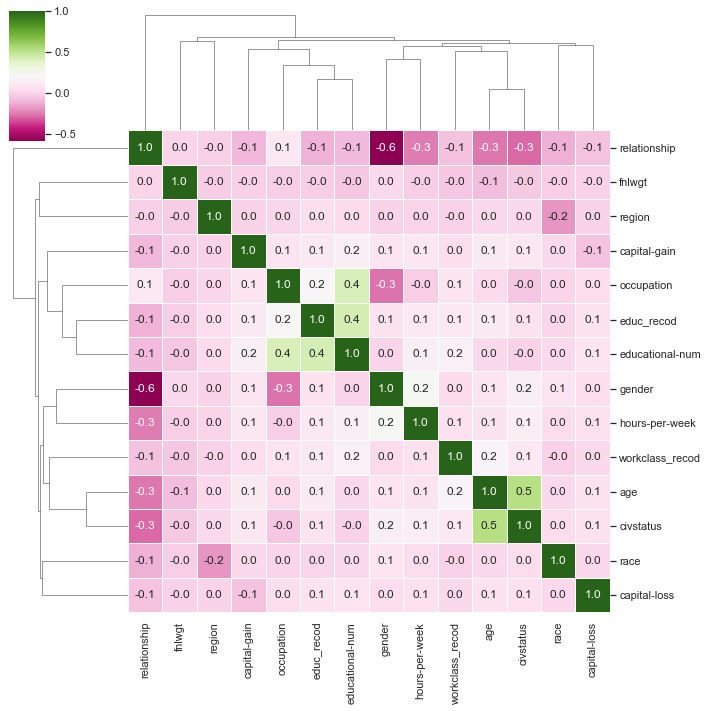

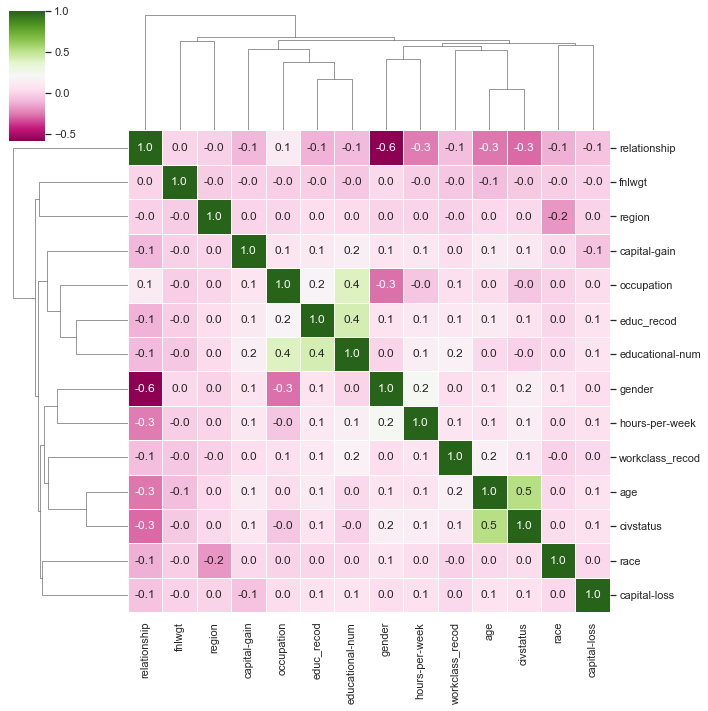

In [16]:
only_oe_models = ['oe_knn', 'oe_simple']
for model in only_oe_models:
    sns.set(font_scale=1, style='whitegrid')
    sns.clustermap(data_processed[model].corr(), annot=True, linewidth=0.9, cmap='PiYG', fmt='.1f')


In [17]:
model_expl = {}
for model in only_oe_models:
    data_ct = sm.add_constant(data_processed[model])
    model_expl[model] = sm.Logit(y, data_ct).fit()
    print(f"--------------------------{model}_reduced------------------------------------")
    display(model_expl[model].summary())

Optimization terminated successfully.
         Current function value: 0.367554
         Iterations 7
--------------------------oe_knn_reduced------------------------------------


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48827
Method:                           MLE   Df Model:                           14
Date:                Mon, 01 Aug 2022   Pseudo R-squ.:                  0.3320
Time:                        00:50:11   Log-Likelihood:                -17952.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.7631      0.017   -103.488      0.000      -1.797      -1.730
age                 0.2567      0.016     15.891      0.000       0.225       0.288
workclass_recod    -0.0422      0.013     -3.227      0.001      -0.068      -0.017
fnlwgt              0.0567      0.013      4.224      0.000       0.030       0.083
educ_recod         -0.0027      0.015     -0.183      0.855      -0.032       0.026
educational-num     0.8071      0.020     41.298      0.000       0.769       0.845
civstatus           0.7358      0.017     43.427      0.000       0.703       0.769
occupation          0.2794      0.015     18.581      0.000       0.250       0.309
relationship       -0.0821      0.020     -4.201      0.000      -0.120      -0.044
race                0.1162      0.015      7.684      0.000       0.087       0.146
gender              0.5154      0.021     24.280      0.000       0.474       0.557
capital-gain        0.6448      0.014     46.246      0.000       0.617       0.672
capital-loss        0.2772      0.012     24.086      0.000       0.255       0.300
hours-per-week      0.3934      0.014     27.697      0.000       0.366       0.421
region              0.0262      0.013      2.034      0.042       0.001       0.051
===================================================================================
"""

Optimization terminated successfully.
         Current function value: 0.368451
         Iterations 7
--------------------------oe_simple_reduced------------------------------------


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48827
Method:                           MLE   Df Model:                           14
Date:                Mon, 01 Aug 2022   Pseudo R-squ.:                  0.3304
Time:                        00:50:12   Log-Likelihood:                -17996.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.7588      0.017   -103.465      0.000      -1.792      -1.725
age                 0.2471      0.016     15.360      0.000       0.216       0.279
workclass_recod    -0.0159      0.013     -1.234      0.217      -0.041       0.009
fnlwgt              0.0579      0.013      4.318      0.000       0.032       0.084
educ_recod         -0.0029      0.015     -0.193      0.847      -0.032       0.026
educational-num     0.8205      0.020     42.039      0.000       0.782       0.859
civstatus           0.7346      0.017     43.383      0.000       0.701       0.768
occupation          0.2451      0.015     16.303      0.000       0.216       0.275
relationship       -0.0837      0.020     -4.289      0.000      -0.122      -0.045
race                0.1175      0.015      7.782      0.000       0.088       0.147
gender              0.5067      0.021     23.903      0.000       0.465       0.548
capital-gain        0.6453      0.014     46.369      0.000       0.618       0.673
capital-loss        0.2781      0.011     24.205      0.000       0.256       0.301
hours-per-week      0.3978      0.014     28.039      0.000       0.370       0.426
region              0.0284      0.013      2.214      0.027       0.003       0.054
===================================================================================
"""

### El model.summary de statsmodels nos ayudará a descartar variables basandonos en el p-value.

In [18]:
model_expl = {}
only_oe_models = ['oe_knn', 'oe_simple']
vars_to_remove = ['educ_recod', 'civstatus_widowed', 'civstatus_divorced', 'race_Other', 'race_Black', 'workclass_recod']
data_processed_remove = {}
models_reduced = []
for model in models:
    real_vars_to_remove = []
    for var in vars_to_remove:
        real_vars_to_remove = real_vars_to_remove + [s for s in data_processed[model].columns.to_list() if var in str(s)]
    data_processed_remove[f"{model}_reduced"] = data_processed[model].drop(columns = real_vars_to_remove)
    data_ct = sm.add_constant(data_processed_remove[f"{model}_reduced"])
    models_reduced = models_reduced + [f"{model}_reduced"]
    model_expl[f"{model}_reduced"] = sm.Logit(y, data_ct).fit()
    # print(f"--------------------------{model}_reduced------------------------------------")
    # display(model_expl[f"{model}_reduced"].summary())

# Agregamos los nombres de los modelos reducidos y sus dataframes asociadas
models = list(models) + models_reduced
data_processed = {**data_processed, **data_processed_remove}

Optimization terminated successfully.
         Current function value: 0.326202
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.367662
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.327086
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.368467
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.446944
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.448241
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.446944
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.448244
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.341253
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.377338
  

# Clasificación (Cross Validation KFold(5))

In [19]:
models

['ohe_knn',
 'oe_knn',
 'ohe_simple',
 'oe_simple',
 'ohe_knn_pca_5',
 'oe_knn_pca_5',
 'ohe_simple_pca_5',
 'oe_simple_pca_5',
 'ohe_knn_pca_10',
 'oe_knn_pca_10',
 'ohe_simple_pca_10',
 'oe_simple_pca_10',
 'ohe_knn_pca_13',
 'oe_knn_pca_13',
 'ohe_simple_pca_13',
 'oe_simple_pca_13',
 'ohe_knn_reduced',
 'oe_knn_reduced',
 'ohe_simple_reduced',
 'oe_simple_reduced',
 'ohe_knn_pca_5_reduced',
 'oe_knn_pca_5_reduced',
 'ohe_simple_pca_5_reduced',
 'oe_simple_pca_5_reduced',
 'ohe_knn_pca_10_reduced',
 'oe_knn_pca_10_reduced',
 'ohe_simple_pca_10_reduced',
 'oe_simple_pca_10_reduced',
 'ohe_knn_pca_13_reduced',
 'oe_knn_pca_13_reduced',
 'ohe_simple_pca_13_reduced',
 'oe_simple_pca_13_reduced']

In [20]:
cvs   = {}
scorings = {"accuracy": "accuracy", "precision" : "precision", "recall": "recall","f1_score":"f1", "roc_auc":"roc_auc"}
metrics = scorings.keys()
for model in models:
    cvs[model] = cross_validate(lr, data_processed[model], y, cv=cv, scoring = scorings)

In [21]:
table_str = '<table><tr><th>Models</th><th>' + '</th><th>'.join(metrics) + '</th><th>Nº de variables</th><th>fit time</th><th>score time</th></tr>'
models.sort()
for model in models:
    table_str += '<tr>'
    table_str += f"<td>{model}</td>"
    for metric in metrics:
        table_str += f"<td>{cvs[model]['test_'+metric].mean():.4f}</td>"
    table_str += f"<td>{len(data_processed[model].columns.to_list())}</td>"
    table_str += f"<td>{cvs[model]['fit_time'].mean():.4f}</td>"
    table_str += f"<td>{cvs[model]['score_time'].mean():.4f}</td>"
    table_str += '</tr>'

display(HTML(table_str))

Models,accuracy,precision,recall,f1_score,roc_auc,Nº de variables,fit time,score time
oe_knn,0.8326,0.7095,0.5088,0.5926,0.8688,14,0.0432,0.0098
oe_knn_pca_10,0.8266,0.7021,0.4785,0.5690,0.8609,10,0.0272,0.0100
oe_knn_pca_10_reduced,0.8266,0.7021,0.4785,0.5690,0.8609,10,0.0260,0.0097
oe_knn_pca_13,0.8325,0.7093,0.5084,0.5922,0.8688,13,0.0304,0.0093
oe_knn_pca_13_reduced,0.8325,0.7093,0.5084,0.5922,0.8688,13,0.0295,0.0093
oe_knn_pca_5,0.7988,0.6822,0.2980,0.4147,0.7820,5,0.0212,0.0091
oe_knn_pca_5_reduced,0.7988,0.6822,0.2980,0.4147,0.7820,5,0.0210,0.0100
oe_knn_reduced,0.8323,0.7088,0.5078,0.5916,0.8688,12,0.0325,0.0094
oe_simple,0.8316,0.7071,0.5060,0.5898,0.8681,14,0.0426,0.0099
oe_simple_pca_10,0.8266,0.7019,0.4787,0.5690,0.8608,10,0.0236,0.0090
